In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data=data.drop(['Name','Ticket','Cabin'],axis=1)

In [ ]:

data['Sex']=data['Sex'].map({'male':0,'female':1})
data['Embarked']=data['Embarked'].fillna('S')
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2})
data=data.dropna()

In [ ]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,2
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
889,890,1,1,0,26.0,0,0,30.0000,1


In [ ]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)[:,1]

In [ ]:
print('Accuracy:',accuracy_score(Y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(Y_test,y_pred))
print('Classification Report:\n',classification_report(Y_test,y_pred))

Accuracy: 0.7552447552447552
Confusion Matrix:
 [[71 16]
 [19 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80        87
           1       0.70      0.66      0.68        56

    accuracy                           0.76       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.76      0.75       143



In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


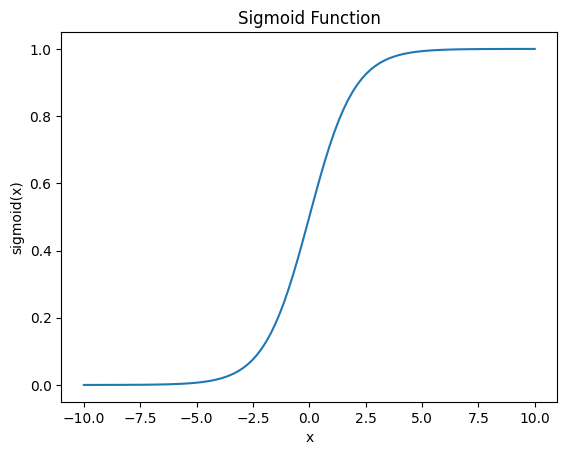

In [ ]:
x_values=np.linspace(-10,10,100)
y_values=sigmoid(x_values)
plt.plot(x_values,y_values)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()